# Scheduling Multipurpose Batch Processes using State-Task Networks

The State-Task Network (STN) is an approach to modeling multipurpose batch process for the purpose of short term scheduling. It was first developed by Kondili, et al., in 1993, and subsequently developed and extended by others. 

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyomo.environ import *

## Bibliographic Notes

Original development --

* Kondili, E., Pantelides, C. C., & Sargent, R. W. H. (1993). A general algorithm for short-term scheduling of batch operations—I. MILP formulation. Computers & Chemical Engineering, 17(2), 211-227. [[pdf](https://www.researchgate.net/profile/Roger-Sargent/publication/222159161_A_General_Algorithm_for_Short-Term_Scheduling_of_Batch_Operations-i_MILP_Formulation/links/5a19d9be0f7e9be37f9a5af1/A-General-Algorithm-for-Short-Term-Scheduling-of-Batch-Operations-i-MILP-Formulation.pdf)]

* Shah, N., Pantelides, C. C., & Sargent, R. W. H. (1993). A general algorithm for short-term scheduling of batch operations—II. Computational issues. Computers & chemical engineering, 17(2), 229-244. [[pdf](https://www.sciencedirect.com/science/article/abs/pii/009813549380016G)]

Process applications and further developments --

* [[pdf](https://www.eq.uc.pt/~marco/eps/Edicao_2016_2017/Aulas_12_15/Pantelides_1994.pdf)]

* Floudas, C. A., & Lin, X. (2005). Mixed integer linear programming in process scheduling: Modeling, algorithms, and applications. Annals of Operations Research, 139(1), 131-162.

* Harjunkoski, I., Maravelias, C. T., Bongers, P., Castro, P. M., Engell, S., Grossmann, I. E., ... & Wassick, J. (2014). Scope for industrial applications of production scheduling models and solution methods. Computers & Chemical Engineering, 62, 161-193.

* Méndez, C. A., Cerdá, J., Grossmann, I. E., Harjunkoski, I., & Fahl, M. (2006). State-of-the-art review of optimization methods for short-term scheduling of batch processes. Computers & Chemical Engineering, 30(6), 913-946.

* Wassick, J. M., & Ferrio, J. (2011). Extending the resource task network for industrial applications. Computers & chemical engineering, 35(10), 2124-2140. [[pdf](https://reader.elsevier.com/reader/sd/pii/S0098135411000123)]

Supply chain applications --

* Castro, P. M., Sun, L., & Harjunkoski, I. (2013). Resource–task network formulations for industrial demand side management of a steel plant. Industrial & Engineering Chemistry Research, 52(36), 13046-13058. [[pubs.acs.org](https://pubs.acs.org/doi/full/10.1021/ie401044q)]

* Ba, B. H., Prins, C., & Prodhon, C. (2018). A generic tactical planning model to supply a biorefinery with biomass. Pesquisa Operacional, 38, 1-30.Ba, B. H., Prins, C., & Prodhon, C. (2018). A generic tactical planning model to supply a biorefinery with biomass. Pesquisa Operacional, 38, 1-30. [[pdf](https://www.scielo.br/j/pope/a/wrqnhVjLs9xS34YMzwt9Hsf/abstract/?lang=enhttps://www.scielo.br/j/pope/a/wrqnhVjLs9xS34YMzwt9Hsf/abstract/?lang=en)]

Python Coding Examples --

* [STN-Scheduler](https://github.com/jckantor/STN-Scheduler)


## Example (Kondili, et al., 1993)

A state-task network is a graphical representation of the activities in a multiproduct batch process. The representation includes the minimum details needed for short term scheduling of batch operations.

A well-studied example due to Kondili (1993) is shown below. Other examples are available in the references cited above.

![Screen%20Shot%202017-09-16%20at%209.45.36%20PM.png](https://jckantor.github.io/CBE30338/figures/Kondili_1993.png)

Each circular node in the diagram designates material in a particular state.  The materials are generally held in suitable vessels with a known capacity. The relevant information for each state is the initial inventory, storage capacity, and the unit price of the material in each state. The price of materials in intermediate states may be assigned penalities in order to minimize the amount of work in progress.

The rectangular nodes denote process tasks. When scheduled for execution, each task is assigned an appropriate piece of equipment, and assigned a batch of material according to the incoming arcs. Each incoming arc begins at a state where the associated label indicates the mass fraction of the batch coming from that particular state. Outgoing arcs indicate the disposition of the batch to product states. The outgoing are labels indicate the fraction of the batch assigned to each product state, and the time necessary to produce that product. 

Not shown in the diagram is the process equipment used to execute the tasks. A separate list of process units is available, each characterized by a capacity and list of tasks which can be performed in that unit.

### Exercise

1. Read this reciped for Hollandaise Sauce: http://www.foodnetwork.com/recipes/tyler-florence/hollandaise-sauce-recipe-1910043. Assume the available equipment consists of one sauce pan and a double-boiler on a stove. Draw a state-task network outlining the basic steps in the recipe.

2. A few months ago you were given process development responsibilities for a start-up company that is attempting to commercialize a novel fermentation technology.  The fermentation produces high-value medicinal products based on an engineered micro-organism. During you short time on the job, you have already developed and commissioned a pilot plant comprised of the following basic operations:

* Enzymatic digestion of the fermentation substrate.  This operation requires a feed of 20\% substrate (S), 79\% water (W), and 1\% enzyme (E). The digestion requires 1 working day to complete all steps. Assume the substrate costs \\$2/kg, the enzyme is \\$20/kg, and water is essentially free.  You acquired a mixer/blender unit for this purpose that can operate on any quantity up to 100 kg.  The product of the digestion operation is called the “wort”. To avoid contamination of the process, wort cannot be stored before use.  

* Digestion is followed by fermentation. The fermentation requires four working day for completion upon which the substrate is entirely consumed.  For this operation, you purchased a 100 liter (kg) fermentor that is working quite well. The product is a turbid suspension that is 20\% solids.

* A batch filtration operation separates the turbid suspension into a clarified intermediate product called “beer” (80\%)  and a solid by-product (20\%)  that can be sold for \\$2/kg.  The filtration device you purchased can handle 100 kg/batch. But the operation has turned out to be messy with frequent equipment breakdown. For planning purposes, you can plan on both products to be ready in 1 working day, but need to plan for additional working day for cleanup and maintenance of the equipment.

* Following coarse filtration, a novel selective membrane separator is used to separate the beer into a product (P) valued at \\$200/kg and a contaminated waste-water stream that costs \\$2/kg to dispose. The product recovery is 5 mass \% of the incoming liquid. The membrane separator was designed to handle 100 kg/day.

Create a State-Task Network describing the pilot plant operation as it exists today.

## Encoding STN data

The basic data structure specifies the states, tasks, and units comprising a state-task network. The intention is for all relevant problem data to be contained in a single JSON-like structure.

In [44]:
# planning horizon
H = 10

# STN Data Structure
Kondili = {
    # time grid
    'TIME':  list(range(0, H+1)),
    
    # states
    'STATES': {
        'Feed_A'   : {'capacity': 500, 'initial': 500, 'price':   0},
        'Feed_B'   : {'capacity': 500, 'initial': 500, 'price':   0},
        'Feed_C'   : {'capacity': 500, 'initial': 500, 'price':   0},
        'Hot_A'    : {'capacity': 100, 'initial':   0, 'price': -10},
        'Int_AB'   : {'capacity': 200, 'initial':   0, 'price': -10},
        'Int_BC'   : {'capacity': 150, 'initial':   0, 'price': -10},
        'Impure_E' : {'capacity': 100, 'initial':   0, 'price': -10},
        'Product_1': {'capacity': 500, 'initial':   0, 'price':  10},
        'Product_2': {'capacity': 500, 'initial':   0, 'price':  1000},
    },
    
    # state to task arcs indexed by (state, task)
    'ST_ARCS': {
        ('Feed_A',   'Heating')   : {'rho': 1.0},
        ('Feed_B',   'Reaction_1'): {'rho': 0.5},
        ('Feed_C',   'Reaction_1'): {'rho': 0.5},
        ('Feed_C',   'Reaction_3'): {'rho': 0.2},
        ('Hot_A',    'Reaction_2'): {'rho': 0.4},
        ('Int_AB',   'Reaction_3'): {'rho': 0.8},
        ('Int_BC',   'Reaction_2'): {'rho': 0.6},
        ('Impure_E', 'Separation'): {'rho': 1.0},
    },
    
    # task to state arcs indexed by (task, state)
    'TS_ARCS': {
        ('Heating',    'Hot_A')    : {'dur': 1, 'rho': 1.0},
        ('Reaction_2', 'Product_1'): {'dur': 2, 'rho': 0.4},
        ('Reaction_2', 'Int_AB')   : {'dur': 2, 'rho': 0.6},
        ('Reaction_1', 'Int_BC')   : {'dur': 2, 'rho': 1.0},
        ('Reaction_3', 'Impure_E') : {'dur': 1, 'rho': 1.0},
        ('Separation', 'Int_AB')   : {'dur': 2, 'rho': 0.1},
        ('Separation', 'Product_2'): {'dur': 1, 'rho': 0.9},
    },
    
    # unit data indexed by (unit, task)
    'UNIT_TASKS': {
        ('Heater',    'Heating')   : {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 0},
        ('Reactor_1', 'Reaction_1'): {'Bmin': 0, 'Bmax':  80, 'Cost': 1, 'vCost': 0, 'Tclean': 0},
        ('Reactor_1', 'Reaction_2'): {'Bmin': 0, 'Bmax':  80, 'Cost': 1, 'vCost': 0, 'Tclean': 0},
        ('Reactor_1', 'Reaction_3'): {'Bmin': 0, 'Bmax':  80, 'Cost': 1, 'vCost': 0, 'Tclean': 0},
        ('Reactor_2', 'Reaction_1'): {'Bmin': 0, 'Bmax':  80, 'Cost': 1, 'vCost': 0, 'Tclean': 0},
        ('Reactor_2', 'Reaction_2'): {'Bmin': 0, 'Bmax':  80, 'Cost': 1, 'vCost': 0, 'Tclean': 0},
        ('Reactor_2', 'Reaction_3'): {'Bmin': 0, 'Bmax':  80, 'Cost': 1, 'vCost': 0, 'Tclean': 0},
        ('Still',     'Separation'): {'Bmin': 0, 'Bmax': 200, 'Cost': 1, 'vCost': 0, 'Tclean': 0},
    },
}

### Setting a Time Grid

The following computations can be done on any time grid, including real-valued time points. TIME is a list of time points commencing at 0.

## Mathematical Model

The following Pyomo model closely follows the development in Kondili, et al. (1993). In particular, the first step in the model is to process the STN data to create sets as given in Kondili.  

One important difference from Kondili is the adoption of a more natural time scale that starts at $t = 0$ and extends to $t = H$ (rather than from 1 to H+1).

A second difference is the introduction of an additional decision variable denoted by $Q_{j,t}$ indicating the amount of material in unit $j$ at time $t$. A material balance then reads

\begin{align*}
Q_{jt} & = Q_{j(t-1)} + \sum_{i\in I_j}B_{ijt} - \sum_{i\in I_j}\sum_{\substack{s \in \bar{S}_i\\s\ni t-P_{is} \geq 0}}\bar{\rho}_{is}B_{ij(t-P_{is})} \qquad \forall j,t
\end{align*}

Following Kondili's notation, $I_j$ is the set of tasks that can be performed in unit $j$, and $\bar{S}_i$ is the set of states fed by task $j$. We assume the units are empty at the beginning and end of production period, i.e.,

\begin{align*}
Q_{j(-1)} & = 0 \qquad \forall j \\
Q_{j,H} & = 0 \qquad \forall j
\end{align*}

The unit allocation constraints are written the full backward aggregation method described by Shah (1993).  The allocation constraint reads

\begin{align*}
\sum_{i \in I_j} \sum_{t'=t}^{t-p_i+1} W_{ijt'} & \leq 1 \qquad \forall j,t
\end{align*}

Each processing unit $j$ is tagged with a minimum and maximum capacity, $B_{ij}^{min}$ and $B_{ij}^{max}$, respectively, denoting the minimum and maximum batch sizes for each task $i$. A minimum capacity may be needed to cover heat exchange coils in a reactor or mixing blades in a blender, for example. The capacity may depend on the nature of the task being performed.  These constraints are written

\begin{align*}
B_{ij}^{min}W_{ijt} & \leq B_{ijt} \leq  B_{ij}^{max}W_{ijt} \qquad \forall j, \forall i\in I_j, \forall t
\end{align*}

## Organizing Problem Data Structures

In [45]:
STN = Kondili

STATES = STN['STATES']
ST_ARCS = STN['ST_ARCS']
TS_ARCS = STN['TS_ARCS']
UNIT_TASKS = STN['UNIT_TASKS']
TIME = STN['TIME']

### Characterizing Time

In [46]:
H = max(TIME)
print(TIME)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### Characterizing Tasks

In [47]:
# set of all tasks 
TASKS = set([i for (_, i) in UNIT_TASKS])

# S[i] set of states which feed task i
S = {i: set() for i in TASKS}
for s, i in ST_ARCS:
    S[i].add(s)

# S_[i] set of states fed by task i
S_ = {i: set() for i in TASKS}
for i, s in TS_ARCS:
    S_[i].add(s)

# rho[(i, s)] input fraction of task i from state s
rho = {(i, s): ST_ARCS[(s, i)]['rho'] for (s, i) in ST_ARCS}

# rho_[(i,s)] output fraction of task i to state s
rho_ = {(i, s): TS_ARCS[(i, s)]['rho'] for (i, s) in TS_ARCS}

# P[(i,s)] time for task i output to state s 
P = {(i, s): TS_ARCS[(i, s)]['dur'] for (i, s) in TS_ARCS}  

# p[i] completion time for task i
p = {i: max([P[(i, s)] for s in S_[i]]) for i in TASKS}

# K[i] set of units capable of task i
K = {i: set() for i in TASKS}
for (j, i) in UNIT_TASKS:
    K[i].add(j) 

# verify
for i in TASKS:
    print(f"TASK {i:10s}   duration = {p[i]:4.1f}")
    for s in S[i]:
        print(f"     Input State {s:10s}    rho = {rho[i, s]:5.1f}")
    for s in S_[i]:
        print(f"    Output State {s:10s}    rho = {rho_[i, s]:5.1f}   dur = {P[i, s]:5.1f}")
    for j in K[i]:
        print(f"            Unit {j:10s}   {UNIT_TASKS[(j, i)]}")
    print()

TASK Separation   duration =  2.0
     Input State Impure_E      rho =   1.0
    Output State Int_AB        rho =   0.1   dur =   2.0
    Output State Product_2     rho =   0.9   dur =   1.0
            Unit Still        {'Bmin': 0, 'Bmax': 200, 'Cost': 1, 'vCost': 0, 'Tclean': 0}

TASK Reaction_2   duration =  2.0
     Input State Int_BC        rho =   0.6
     Input State Hot_A         rho =   0.4
    Output State Int_AB        rho =   0.6   dur =   2.0
    Output State Product_1     rho =   0.4   dur =   2.0
            Unit Reactor_2    {'Bmin': 0, 'Bmax': 80, 'Cost': 1, 'vCost': 0, 'Tclean': 0}
            Unit Reactor_1    {'Bmin': 0, 'Bmax': 80, 'Cost': 1, 'vCost': 0, 'Tclean': 0}

TASK Reaction_1   duration =  2.0
     Input State Feed_C        rho =   0.5
     Input State Feed_B        rho =   0.5
    Output State Int_BC        rho =   1.0   dur =   2.0
            Unit Reactor_2    {'Bmin': 0, 'Bmax': 80, 'Cost': 1, 'vCost': 0, 'Tclean': 0}
            Unit Reactor_1    {'Bmi

### Characterizing States

In [48]:
# T[s] set of tasks receiving material from state s 
T = {s: set() for s in STATES}
for (s, i) in ST_ARCS:
    T[s].add(i)

# set of tasks producing material for state s
T_ = {s: set() for s in STATES}
for (i, s) in TS_ARCS:
    T_[s].add(i)

# C[s] storage capacity for state s
C = {s: STATES[s]['capacity'] for s in STATES}

# verify
for s in STATES:
    print(f"\nSTATE {s:10s}  capacity = {C[s]:5.1f}  ic = {STATES[s]['initial']:5.1f}  price = {STATES[s]['price']:5.2f}")
    for i in T_[s]:
        print(f"    Input from task {i:10s}")
    for i in T[s]:
        print(f"     Output to task {i:10s}")



STATE Feed_A      capacity = 500.0  ic = 500.0  price =  0.00
     Output to task Heating   

STATE Feed_B      capacity = 500.0  ic = 500.0  price =  0.00
     Output to task Reaction_1

STATE Feed_C      capacity = 500.0  ic = 500.0  price =  0.00
     Output to task Reaction_3
     Output to task Reaction_1

STATE Hot_A       capacity = 100.0  ic =   0.0  price = -10.00
    Input from task Heating   
     Output to task Reaction_2

STATE Int_AB      capacity = 200.0  ic =   0.0  price = -10.00
    Input from task Separation
    Input from task Reaction_2
     Output to task Reaction_3

STATE Int_BC      capacity = 150.0  ic =   0.0  price = -10.00
    Input from task Reaction_1
     Output to task Reaction_2

STATE Impure_E    capacity = 100.0  ic =   0.0  price = -10.00
    Input from task Reaction_3
     Output to task Separation

STATE Product_1   capacity = 500.0  ic =   0.0  price = 10.00
    Input from task Reaction_2

STATE Product_2   capacity = 500.0  ic =   0.0  price = 1

### Characterizing the Processing Units

In [49]:
# set of all units
UNITS = set([j for (j, _) in UNIT_TASKS])

# create indexed set where I[j] is the set of tasks performed with unit j
I = {j: set() for j in UNITS}
for (j, i) in UNIT_TASKS:
    I[j].add(i)

# Bmin[(i, j)] minimum capacity of unit j for task i
Bmin = {(i, j): UNIT_TASKS[j, i]['Bmin'] for j, i in UNIT_TASKS}

# Bmax[(i, j)] maximum capacity of unit j for task i
Bmax = {(i, j): UNIT_TASKS[j, i]['Bmax'] for j, i in UNIT_TASKS}


# verify
for j in UNITS:
    print(f"\nUNIT {j:10s}")
    for i in I[j]:
        print(f"   TASK {i:10s}   Bmin = {Bmin[i, j]:5.2f}    Bmax = {Bmax[i, j]:5.1f}") 
        


UNIT Reactor_2 
   TASK Reaction_3   Bmin =  0.00    Bmax =  80.0
   TASK Reaction_2   Bmin =  0.00    Bmax =  80.0
   TASK Reaction_1   Bmin =  0.00    Bmax =  80.0

UNIT Reactor_1 
   TASK Reaction_3   Bmin =  0.00    Bmax =  80.0
   TASK Reaction_2   Bmin =  0.00    Bmax =  80.0
   TASK Reaction_1   Bmin =  0.00    Bmax =  80.0

UNIT Heater    
   TASK Heating      Bmin =  0.00    Bmax = 100.0

UNIT Still     
   TASK Separation   Bmin =  0.00    Bmax = 200.0


### Pyomo Model

In [50]:
m = ConcreteModel()

# W[i, j, t] logical variable to start task i starts on unit j at time t
m.W = Var(TASKS, UNITS, TIME, domain=Boolean)

# B[i, j, t,] size of batch assigned to task i on unit j at time t
m.B = Var(TASKS, UNITS, TIME, domain=NonNegativeReals)

# S[s, t] inventory of state s from t to t+1
m.S = Var(STATES.keys(), TIME, domain=NonNegativeReals)

# Q[j,t] inventory of unit j from time t to t+1
m.Q = Var(UNITS, TIME, domain=NonNegativeReals)           

# Objective is to maximize the value of the final state (see Kondili, Sec. 5)

@m.Expression()
def value_of_states(m):
    return sum([STATES[s]['price'] * m.S[s, H] for s in STATES])

@m.Expression()
def cost_of_operation(m):
    return sum([UNIT_TASKS[j, i]['Cost'] * m.W[i, j, t] for i in TASKS for j in K[i] for t in TIME]) + \
           sum([UNIT_TASKS[j, i]['vCost'] * m.B[i, j, t] for i in TASKS for j in K[i] for t in TIME])

@m.Objective(sense=maximize)
def profit(m):
    return m.value_of_states - m.cost_of_operation

# state capacity constraint
@m.Constraint(STATES, TIME)
def state_capacity(m, s, t):
    return m.S[s, t] <= C[s]

# unit capacity constraints
@m.Constraint(TASKS, UNITS, TIME)
def unit_capacity_min(m, i, j, t):
    if i in I[j]:
        return m.B[i, j, t] >= m.W[i , j, t] * Bmin[i,j]
    return Constraint.Skip

@m.Constraint(TASKS, UNITS, TIME)
def unit_capacity_max(m, i, j, t):
    if i in I[j]:
        return m.B[i, j, t] <= m.W[i,j,t] * Bmax[i,j]
    return Constraint.Skip

# constraint to avoid assigning j to more than one task at time t
@m.Constraint(UNITS, TIME)
def assignment(m, j, t):
    return 1 >= sum(m.W[i, j, tp] for i in I[j] for tp in TIME if tp >= (t - p[i] + 1 - UNIT_TASKS[j, i]['Tclean']) and tp <= t)

# mass balances on each state
@m.Constraint(STATES, TIME)
def state_balance(m, s, t):
    mass_in = sum(rho_[i, s] * m.B[i, j, t - P[i, s]] for i in T_[s] for j in K[i] if t >= P[i, s])
    mass_out = sum(rho[i, s] * m.B[i, j, t] for i in T[s] for j in K[i])
    if t == TIME[0]:
        return m.S[s, t] == STATES[s]['initial'] + mass_in - mass_out
    return m.S[s, t] == m.S[s, t-1] + mass_in - mass_out

# mass balance on each unit
@m.Constraint(UNITS, TIME)
def unit_balance(m, j, t):
    mass_in = sum(m.B[i, j, t] for i in I[j])
    mass_out = sum(rho_[i,s] * m.B[i, j, t - P[i,s]] for i in I[j] for s in S_[i] if t >= P[i,s])
    if t == TIME[0]:
        return m.Q[j, t] == mass_in - mass_out
    return m.Q[j, t] == m.Q[j, t-1] + mass_in - mass_out

@m.Constraint(UNITS)
def terminal(m, j):
    return m.Q[j, H] == 0

SolverFactory('cbc').solve(m).write()


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 194457.66666667
  Upper bound: 194457.66666667
  Number of objectives: 1
  Number of constraints: 123
  Number of variables: 175
  Number of binary variables: 88
  Number of integer variables: 88
  Number of nonzeros: 93
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.26
  Wallclock time: 0.33
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics:

In [51]:
# Unit Schedules
for j in sorted(UNITS):
    print(f"\nUNIT {j:10s} Start  Finish     Batch")
    for t in TIME:
        for i in TASKS:
            if m.W[i, j, t]() is not None:
                if m.W[i, j, t]() > 0.5: 
                    print(f"    {i:10s}    {t:3d}     {t + p[i]:3d}     {m.B[i, j, t]():5.1f}")


UNIT Heater     Start  Finish     Batch
    Heating         1       2      64.0
    Heating         4       5      42.7

UNIT Reactor_1  Start  Finish     Batch
    Reaction_1      0       2      80.0
    Reaction_2      2       4      80.0
    Reaction_3      4       5      40.0
    Reaction_2      5       7      26.7
    Reaction_3      7       8      15.0

UNIT Reactor_2  Start  Finish     Batch
    Reaction_1      0       2      80.0
    Reaction_2      2       4      80.0
    Reaction_3      4       5      80.0
    Reaction_2      5       7      80.0
    Reaction_3      7       8      80.0

UNIT Still      Start  Finish     Batch
    Separation      5       7     120.0
    Separation      8      10      95.0


In [52]:
print("   Time   ", end="")
for j in sorted(UNITS):
    print(f"  {j:>8s}", end="")
for t in TIME:
    print(f"\n    {t:3d}", end="")
    for j in sorted(UNITS):
        print(f"      {m.Q[j, t]():5.1f}", end="")

   Time       Heater  Reactor_1  Reactor_2     Still
      0        0.0       80.0       80.0        0.0
      1       64.0       80.0       80.0        0.0
      2        0.0       80.0       80.0        0.0
      3        0.0       80.0       80.0        0.0
      4       42.7       40.0       80.0        0.0
      5        0.0       26.7       80.0      120.0
      6        0.0       26.7       80.0       12.0
      7        0.0       15.0       80.0        0.0
      8        0.0        0.0        0.0       95.0
      9        0.0        0.0        0.0        9.5
     10        0.0        0.0        0.0        0.0

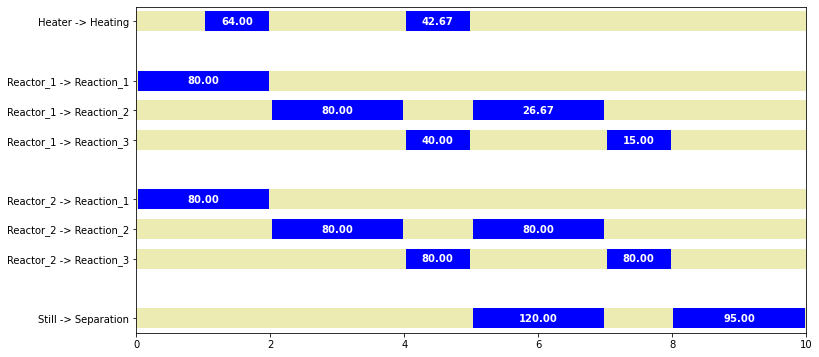

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

gap = H/500
idx = 1
lbls = []
ticks = []
for j in sorted(UNITS):
    idx -= 1
    for i in sorted(I[j]):
        idx -= 1
        ticks.append(idx)
        lbls.append("{0:s} -> {1:s}".format(j,i))
        ax.plot([0, H],[idx, idx], lw=20, alpha=.3, color='y')
        for t in TIME:
            if m.W[i, j, t]() > 0:
                ax.plot([t + gap, t + p[i] - gap], [idx, idx], 'b', lw=20, solid_capstyle='butt')
                txt = "{0:.2f}".format(m.B[i,j,t]())
                ax.text(t + p[i]/2, idx, txt, color='white', weight='bold', ha='center', va='center')

ax.set_xlim(0,H)
ax.set_yticks(ticks)
ax.set_yticklabels(lbls);

In [54]:
df = pd.DataFrame([[m.S[s,t]() for s in STATES] for t in TIME], columns = STATES, index = TIME)
df = df.sort_index()
df.display()

AttributeError: 'DataFrame' object has no attribute 'display'

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
## Analysis

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

### Profitability



In [33]:
print(f"Value of State Inventories = {m.value_of_states():12.2f}")
print(f"  Cost of Unit Assignments = {m.cost_of_operation():12.2f}")
print(f"             Net Objective = {m.value_of_states() - m.cost_of_operation():12.2f}")

Value of State Inventories =      2906.67
  Cost of Unit Assignments =        14.00
             Net Objective =      2892.67


### State Inventories

In [34]:
df = pd.DataFrame([[m.S[s,t]() for s in STATES] for t in TIME], columns = STATES, index = TIME)
df = df.sort_index()
df

,Feed_A,Feed_B,Feed_C,Hot_A,Int_AB,Int_BC,Impure_E,Product_1,Product_2
0,500.00000,420.0,420.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,436.00000,420.0,420.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,436.00000,420.0,420.0,0.0,0.0,64.0,0.0,0.00000,0.0
3,436.00000,420.0,420.0,0.0,0.0,64.0,0.0,0.00000,0.0
4,393.33333,420.0,396.0,0.0,0.0,64.0,0.0,64.00000,0.0
5,393.33333,420.0,396.0,0.0,0.0,0.0,0.0,64.00000,0.0
6,393.33333,420.0,396.0,0.0,0.0,0.0,0.0,64.00000,108.0
7,393.33333,420.0,377.0,0.0,0.0,0.0,0.0,106.66667,108.0
8,393.33333,420.0,377.0,0.0,0.0,0.0,0.0,106.66667,108.0
9,393.33333,420.0,377.0,0.0,0.0,0.0,0.0,106.66667,193.5


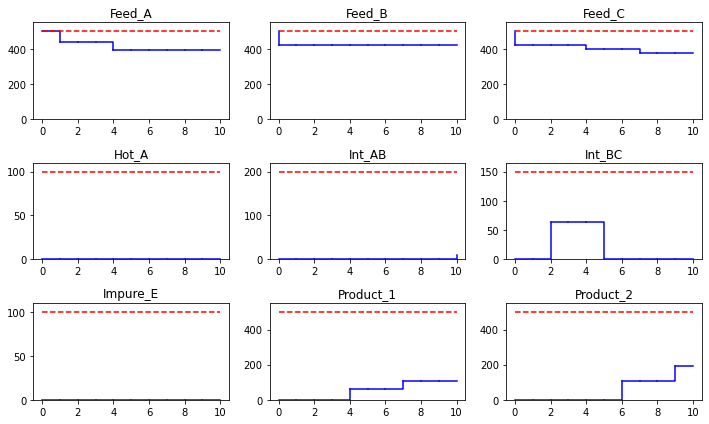

In [35]:
plt.figure(figsize=(10,6))
for (s, idx) in zip(STATES, range(0, len(STATES))):
    plt.subplot(ceil(len(STATES)/3), 3, idx+1)
    tlast, ylast = 0, STATES[s]['initial']
    for (t, y) in zip(list(TIME), [m.S[s,t]() for t in TIME]):
        plt.plot([tlast, t, t], [ylast, ylast, y],'b')
        tlast, ylast = t, y
    plt.ylim(0, 1.1*C[s])
    plt.plot([0, H], [C[s], C[s]],'r--')
    plt.title(s)
plt.tight_layout()

### Unit Assignment

In [38]:
UnitAssignment = pd.DataFrame({j:[None for t in TIME] for j in UNITS},index=TIME)

for t in TIME:
    for j in UNITS:
        for i in I[j]:
            for s in S_[i]:
                if t-p[i] >= 0:
                    if m.W[i, j, max(np.array(TIME)[np.array(TIME) <= t-p[i]])]() > 0:
                        UnitAssignment.loc[t,j] = None               
        for i in I[j]:
            if m.W[i,j,t]() > 0:
                UnitAssignment.loc[t,j] = (i, m.B[i,j,t]())

UnitAssignment

,Still,Reactor_1,Reactor_2,Heater
0,None,"(Reaction_1, 80.0)","(Reaction_1, 80.0)",None
1,None,None,None,"(Heating, 64.0)"
2,None,"(Reaction_2, 80.0)","(Reaction_2, 80.0)",None
3,None,None,None,None
4,None,"(Reaction_3, 40.0)","(Reaction_3, 80.0)","(Heating, 42.666667)"
5,"(Separation, 120.0)","(Reaction_2, 26.666667)","(Reaction_2, 80.0)",None
6,None,None,None,None
7,None,"(Reaction_3, 15.0)","(Reaction_3, 80.0)",None
8,"(Separation, 95.0)",None,None,None
9,None,None,None,None


### Unit Batch Inventories

In [364]:
pd.DataFrame([[model.Q[j,t]() for j in UNITS] for t in TIME], columns = UNITS, index = TIME)

,Still,Heater,Reactor_2,Reactor_1
0,0.0,96.0,80.0,80.0
1,0.0,0.0,80.0,80.0
2,0.0,0.0,80.0,80.0
3,0.0,64.0,160.0,160.0
4,0.0,0.0,160.0,80.0
5,80.0,0.0,80.0,80.0
6,8.0,0.0,80.0,160.0
7,0.0,0.0,80.0,40.0
8,200.0,0.0,0.0,0.0
9,20.0,0.0,0.0,0.0


### Gannt Chart

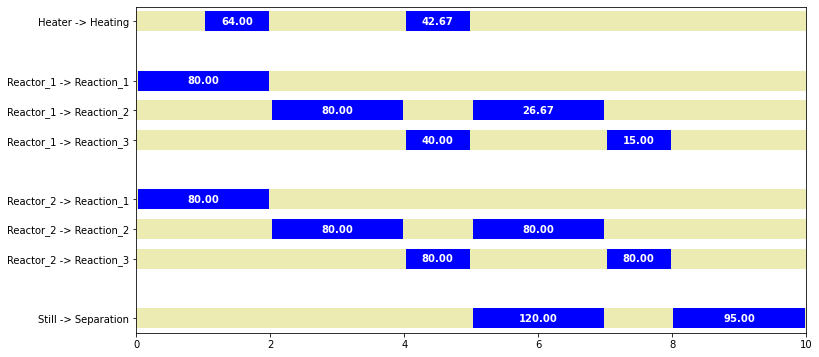

In [365]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

gap = H/500
idx = 1
lbls = []
ticks = []
for j in sorted(UNITS):
    idx -= 1
    for i in sorted(I[j]):
        idx -= 1
        ticks.append(idx)
        lbls.append("{0:s} -> {1:s}".format(j,i))
        plt.plot([0,H],[idx,idx],lw=20,alpha=.3,color='y')
        for t in TIME:
            if m.W[i,j,t]() > 0:
                plt.plot([t+gap,t+p[i]-gap], [idx,idx],'b', lw=20, solid_capstyle='butt')
                txt = "{0:.2f}".format(m.B[i,j,t]())
                plt.text(t+p[i]/2, idx, txt, color='white', weight='bold', ha='center', va='center')
plt.xlim(0,H)
plt.gca().set_yticks(ticks)
plt.gca().set_yticklabels(lbls);

## Trace of Events and States

In [366]:
sep = '\n--------------------------------------------------------------------------------------------\n'
print(sep)
print("Starting Conditions")
print("    Initial Inventories:")            
for s in STATES.keys():
        print("        {0:10s}  {1:6.1f} kg".format(s,STATES[s]['initial']))
        
units = {j:{'assignment':'None', 't':0} for j in UNITS}

for t in TIME:
    print(sep)
    print("Time =",t,"hr")
    print("    Instructions:")
    for j in UNITS:
        units[j]['t'] += 1
        # transfer from unit to states
        for i in I[j]:  
            for s in S_[i]:
                if t-P[(i,s)] >= 0:
                    amt = rho_[(i,s)]*model.B[i,j,max(TIME[TIME <= t - P[(i,s)]])]()
                    if amt > 0:
                        print("        Transfer", amt, "kg from", j, "to", s)
    for j in UNITS:
        # release units from tasks
        for i in I[j]:
            if t-p[i] >= 0:
                if model.W[i,j,max(TIME[TIME <= t-p[i]])]() > 0:
                    print("        Release", j, "from", i)
                    units[j]['assignment'] = 'None'
                    units[j]['t'] = 0
        # assign units to tasks             
        for i in I[j]:
            if model.W[i,j,t]() > 0:
                print("        Assign", j, "with capacity", Bmax[(i,j)], "kg to task",i,"for",p[i],"hours")
                units[j]['assignment'] = i
                units[j]['t'] = 1
        # transfer from states to starting tasks
        for i in I[j]:
            for s in S[i]:
                amt = rho[(i,s)]*model.B[i,j,t]()
                if amt > 0:
                    print("        Transfer", amt,"kg from", s, "to", j)
    print("\n    Inventories are now:")            
    for s in STATES.keys():
        print("        {0:10s}  {1:6.1f} kg".format(s,model.S[s,t]()))
    print("\n    Unit Assignments are now:")
    for j in UNITS:
        if units[j]['assignment'] != 'None':
            fmt = "        {0:s} performs the {1:s} task with a {2:.2f} kg batch for hour {3:f} of {4:f}"
            i = units[j]['assignment']
            print(fmt.format(j,i,model.Q[j,t](),units[j]['t'],p[i]))
            
print(sep)
print('Final Conditions')
print("    Final Inventories:")            
for s in STATES.keys():
        print("        {0:10s}  {1:6.1f} kg".format(s,model.S[s,H]()))



--------------------------------------------------------------------------------------------

Starting Conditions
    Initial Inventories:
        Feed_A       500.0 kg
        Feed_B       500.0 kg
        Feed_C       500.0 kg
        Hot_A          0.0 kg
        Int_AB         0.0 kg
        Int_BC         0.0 kg
        Impure_E       0.0 kg
        Product_1      0.0 kg
        Product_2      0.0 kg

--------------------------------------------------------------------------------------------

Time = 0 hr
    Instructions:
        Assign Heater with capacity 100 kg to task Heating for 1 hours
        Transfer 96.0 kg from Feed_A to Heater
        Assign Reactor_2 with capacity 80 kg to task Reaction_1 for 2 hours
        Transfer 40.0 kg from Feed_C to Reactor_2
        Transfer 40.0 kg from Feed_B to Reactor_2
        Assign Reactor_1 with capacity 80 kg to task Reaction_1 for 2 hours
        Transfer 40.0 kg from Feed_C to Reactor_1
        Transfer 40.0 kg from Feed_B to React

TypeError: '<=' not supported between instances of 'list' and 'int'